<a href="https://colab.research.google.com/github/MarioAvolio/AI-Project/blob/main/assignment%204/Rescal_with_PyKEEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! python -c "import pykeen" || pip install git+https://github.com/pykeen/pykeen.git


In [31]:
import pykeen
pykeen.env()

Key,Value
OS,posix
Platform,Linux
Release,5.15.109+
Time,Wed Sep 6 14:54:48 2023
Python,3.10.12
PyKEEN,1.10.2-dev
PyKEEN Hash,UNHASHED
PyKEEN Branch,
PyTorch,2.0.1+cu118
CUDA Available?,true


In [32]:
import pandas as pd
import numpy as np


### Load Training Data

In [33]:
countries_train_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/train.txt", sep="\t", names=["subject", "predicate", "object"])

In [34]:
countries_validation_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/valid.txt", sep="\t", names=["subject", "predicate", "object"])

In [35]:
countries_train_pd = pd.concat([countries_train_pd, countries_validation_pd])

We are including also validation because we want to be sure to avoid that corrupted triples may be real triples (in test or validation set).

In [36]:
countries_test_pd = pd.read_csv("https://raw.githubusercontent.com/ZhenfengLei/KGDatasets/master/Countries/Countries_S1/test.txt", sep="\t", names=["subject", "predicate", "object"])

In [37]:
countries_train_pd

,subject,predicate,object
0,western_africa,locatedin,africa
1,slovakia,neighbor,ukraine
2,slovakia,neighbor,hungary
3,slovakia,neighbor,austria
4,slovakia,neighbor,czechia
...,...,...,...
19,lesotho,locatedin,africa
20,romania,locatedin,europe
21,rwanda,locatedin,africa
22,ireland,locatedin,europe


In [38]:
entities = list(set(countries_train_pd["subject"].unique().tolist() + countries_train_pd["object"].unique().tolist()))

In [39]:
entities

['saint_kitts_and_nevis',
 'ukraine',
 'malaysia',
 'malta',
 'peru',
 'palestine',
 'myanmar',
 'nepal',
 'ireland',
 'saint_barthélemy',
 'bolivia',
 'argentina',
 'french_polynesia',
 'laos',
 'costa_rica',
 'maldives',
 'colombia',
 'british_virgin_islands',
 'australia_and_new_zealand',
 'singapore',
 'ivory_coast',
 'south_sudan',
 'spain',
 'central_america',
 'moldova',
 'south_africa',
 'fiji',
 'belize',
 'denmark',
 'belarus',
 'christmas_island',
 'jersey',
 'mali',
 'chile',
 'nigeria',
 'bulgaria',
 'mauritania',
 'somalia',
 'western_sahara',
 'paraguay',
 'northern_america',
 'armenia',
 'seychelles',
 'greenland',
 'jordan',
 'tonga',
 'western_africa',
 'dr_congo',
 'new_zealand',
 'serbia',
 'republic_of_the_congo',
 'south_america',
 'western_europe',
 'liberia',
 'uzbekistan',
 'southern_africa',
 'polynesia',
 'bahamas',
 'faroe_islands',
 'mauritius',
 'cuba',
 'suriname',
 'bangladesh',
 'kiribati',
 'mongolia',
 'tunisia',
 'saint_lucia',
 'melanesia',
 'northe

In [40]:
number_of_entities = len(entities)

In [41]:
number_of_entities

271

## To PyKEEN TriplesFactory

In [42]:
from pykeen.triples import TriplesFactory

In [43]:
countries_train_pd[["subject", "predicate", "object"]].values

array([['western_africa', 'locatedin', 'africa'],
       ['slovakia', 'neighbor', 'ukraine'],
       ['slovakia', 'neighbor', 'hungary'],
       ...,
       ['rwanda', 'locatedin', 'africa'],
       ['ireland', 'locatedin', 'europe'],
       ['djibouti', 'locatedin', 'africa']], dtype=object)

In [44]:
training_labels = TriplesFactory.from_labeled_triples(
  countries_train_pd[["subject", "predicate", "object"]].values,
  create_inverse_triples=False,
  entity_to_id=None,
  relation_to_id=None,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

testing_labels = TriplesFactory.from_labeled_triples(
  countries_test_pd[["subject", "predicate", "object"]].values,
  create_inverse_triples=False,
  entity_to_id=training_labels.entity_to_id,
  relation_to_id=training_labels.relation_to_id,
  compact_id=True,
  filter_out_candidate_inverse_relations=True,
  metadata=None,
)

In [45]:
testing_labels

TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=24)

## Training Pipeline

In [46]:
from pykeen.pipeline import pipeline
import torch

In [47]:
pipeline_result_rescal = pipeline(
    training=training_labels,
    testing=testing_labels,
    #dataset='Countries',
    model='Rescal',
    model_kwargs=dict(embedding_dim=80),
    random_seed=256,
    optimizer = torch.optim.Adam,
    optimizer_kwargs=dict(lr=1.0e-02),
    training_kwargs=dict(num_epochs=100),
)

# epochs = 100
# embedding_size = 80


# params = initialize_parameters(rnd_key, number_of_entities, embedding_size)
# opt_init, opt_update = optax.adam(0.001)
# opt_state = opt_init(params)
# pbar = tqdm(total=epochs, position=0)



INFO:pykeen.pipeline.api:Using device: None


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


In [48]:
def print_metrics(pipeline_result):
  print(pipeline_result.training)
  print()
  print('hits@10', pipeline_result.get_metric('hits@10'))
  print('mr', pipeline_result.get_metric('mr'))
  print('mrr', pipeline_result.get_metric('mrr'))
  print()
  pipeline_result.plot_losses()

### Evaluation Metrics

TriplesFactory(num_entities=271, num_relations=2, create_inverse_triples=False, num_triples=1134)

hits@10 0.5416666666666666
mr 50.04166793823242
mrr 0.28509607911109924



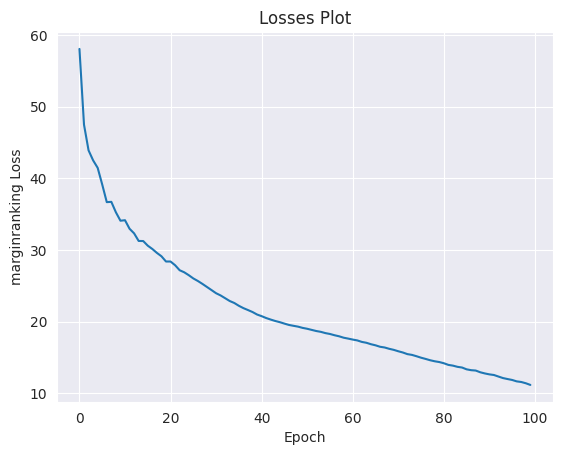

In [49]:
print_metrics(pipeline_result_rescal)

## Predict

In [50]:
countries_test_pd_locatedin = countries_test_pd.query('predicate == "locatedin"')
countries_test_pd_locatedin

,subject,predicate,object
0,zambia,locatedin,africa
1,morocco,locatedin,africa
2,san_marino,locatedin,europe
3,canada,locatedin,americas
4,uganda,locatedin,africa
5,belgium,locatedin,europe
6,syria,locatedin,asia
7,mali,locatedin,africa
8,russia,locatedin,europe
9,israel,locatedin,asia


In [51]:
from pykeen import predict

for x,y,z in countries_test_pd_locatedin[["subject", "predicate", "object"]].values:
  print(x,y,z)

  object_predicted = predict.predict_target(
    model=pipeline_result_rescal.model, head=x, relation=y, triples_factory=pipeline_result_rescal.training,
  ).df

  print(object_predicted)


zambia locatedin africa
     tail_id     score                      tail_label
13        13  0.000501                            asia
77        77 -0.000155                          europe
1          1 -0.000162                          africa
5          5 -0.000247                        americas
42        42 -0.177506                       caribbean
..       ...       ...                             ...
139      139 -2.055871                        maldives
152      152 -2.102990                          monaco
93        93 -2.108726                         grenada
136      136 -2.149255                      madagascar
32        32 -2.185841  british_indian_ocean_territory

[271 rows x 3 columns]
morocco locatedin africa
     tail_id     score                      tail_label
13        13  0.000670                            asia
77        77 -0.000204                          europe
1          1 -0.000220                          africa
5          5 -0.000325                        a

In [52]:
# canada + locatedin = ?

predict.predict_target(
    model=pipeline_result_rescal.model, head="canada", relation="locatedin", triples_factory=pipeline_result_rescal.training,
).df


,tail_id,score,tail_label
13,13,0.000760,asia
77,77,-0.000190,europe
1,1,-0.000272,africa
5,5,-0.000325,americas
42,42,-0.252564,caribbean
...,...,...,...
139,139,-2.950388,maldives
152,152,-3.060450,monaco
93,93,-3.082231,grenada
136,136,-3.118996,madagascar


In [53]:

predict.predict_target(
    model=pipeline_result_rescal.model, head="italy", relation="locatedin", triples_factory=pipeline_result_rescal.training,
).df

,tail_id,score,tail_label
13,13,0.000570,asia
77,77,-0.000170,europe
1,1,-0.000187,africa
5,5,-0.000279,americas
42,42,-0.193896,caribbean
...,...,...,...
139,139,-2.259456,maldives
152,152,-2.336775,monaco
93,93,-2.342309,grenada
136,136,-2.390748,madagascar


In [54]:
predict.predict_target(
    model=pipeline_result_rescal.model, head="italy", relation="neighbor", triples_factory=pipeline_result_rescal.training,
).df

,tail_id,score,tail_label
194,194,0.132007,russia
50,50,0.101498,china
82,82,0.003414,france
1,1,0.000471,africa
5,5,-0.000111,americas
...,...,...,...
41,41,-1.817940,cape_verde
208,208,-1.817958,seychelles
141,141,-1.853577,malta
199,199,-1.952971,saint_lucia


In [55]:

predict.predict_target(
    model=pipeline_result_rescal.model, head="canada", relation="neighbor", triples_factory=pipeline_result_rescal.training,
).df

,tail_id,score,tail_label
50,50,0.013610,china
1,1,0.000547,africa
13,13,-0.000263,asia
5,5,-0.000341,americas
77,77,-0.000802,europe
...,...,...,...
32,32,-3.521326,british_indian_ocean_territory
199,199,-3.532139,saint_lucia
139,139,-3.561873,maldives
141,141,-3.594182,malta


## Visualize

In [56]:
entity_embeddings = pipeline_result_rescal.model.entity_representations[0]().cpu().detach().numpy().astype('float32')
entity_embeddings.shape

(271, 80)

In [57]:
entity_embeddings

array([[ 4.8703071e-01,  3.5974923e-01,  8.0004886e-02, ...,
         6.2263720e-02,  3.5590875e-01,  4.1122684e-01],
       [ 1.5170293e-04, -4.6782775e-04,  6.7434339e-05, ...,
        -3.1782661e-06,  3.1566884e-05, -1.2168318e-05],
       [ 5.0920480e-01,  1.1254172e-01,  1.5317090e-01, ...,
         7.8708686e-02,  3.5107097e-01,  4.0266776e-01],
       ...,
       [ 1.2284277e-01,  4.5262262e-01,  2.0463707e-01, ...,
         3.3181798e-01,  3.7747768e-01,  3.8163450e-01],
       [ 4.4992509e-01,  1.1835086e-01,  6.5693446e-02, ...,
         4.4232345e-01,  2.7312639e-01,  4.3793717e-01],
       [-6.4741500e-02,  3.7653381e-01,  5.1150167e-01, ...,
         1.9593632e-01,  4.1033781e-01,  5.0769746e-01]], dtype=float32)

In [58]:
relation_embeddings = pipeline_result_rescal.model.relation_representations[0]().cpu().detach().numpy().astype('float32')
relation_embeddings.shape

(2, 80, 80)

In [59]:
entity_embeddings

array([[ 4.8703071e-01,  3.5974923e-01,  8.0004886e-02, ...,
         6.2263720e-02,  3.5590875e-01,  4.1122684e-01],
       [ 1.5170293e-04, -4.6782775e-04,  6.7434339e-05, ...,
        -3.1782661e-06,  3.1566884e-05, -1.2168318e-05],
       [ 5.0920480e-01,  1.1254172e-01,  1.5317090e-01, ...,
         7.8708686e-02,  3.5107097e-01,  4.0266776e-01],
       ...,
       [ 1.2284277e-01,  4.5262262e-01,  2.0463707e-01, ...,
         3.3181798e-01,  3.7747768e-01,  3.8163450e-01],
       [ 4.4992509e-01,  1.1835086e-01,  6.5693446e-02, ...,
         4.4232345e-01,  2.7312639e-01,  4.3793717e-01],
       [-6.4741500e-02,  3.7653381e-01,  5.1150167e-01, ...,
         1.9593632e-01,  4.1033781e-01,  5.0769746e-01]], dtype=float32)

In [60]:
from operator import sub
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def quick_plot(labels, embedding, colors = None, plot = True):
  """
  we ignore the words we are not interested to reduce the time to compute
  the 2D embeddings, but this is an approximation.
  """

  if not colors:
    colors = ['b' for _ in labels]

  X = embedding
  pca = PCA(n_components=2)

  two_d_emb = pca.fit_transform(X)

  plt.scatter(two_d_emb[:, 0], two_d_emb[:, 1], c = colors)

  for index, label in enumerate(labels):
    # annotate
    plt.annotate(label, xy=(two_d_emb[index, 0], two_d_emb[index, 1]), )

  if plot:
    plt.gcf().set_size_inches(20, 10)
    plt.show()

  return plt, pca

In [61]:
continents = set(countries_train_pd.query('predicate == "locatedin"')['object'].unique())

In [62]:
def get_color(x):
  if x in continents:
    return 'red'
  else:
    return 'blue'

colors = [get_color(ent) for ent in entities]

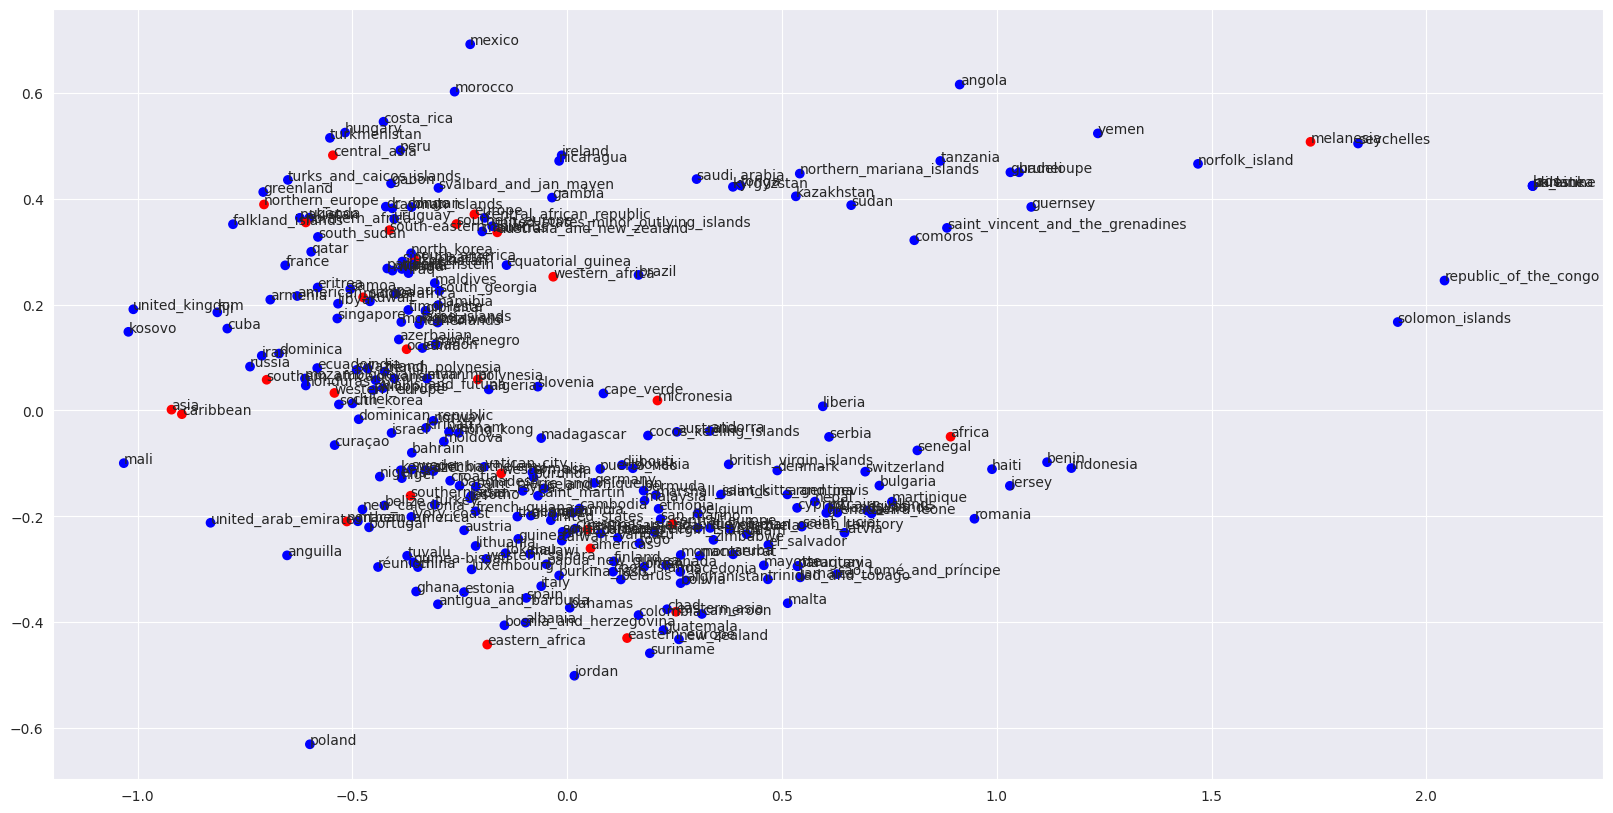

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>,
 PCA(n_components=2))

In [63]:
quick_plot(entities, entity_embeddings, colors=colors)